In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive
%cd MyDrive
%cd darknet

/content/drive
/content/drive/MyDrive
/content/drive/MyDrive/darknet


In [ ]:
!ls

drive  sample_data


In [ ]:
# !make

In [ ]:
!./darknet detector train custom_data/detector.data custom_data/cfg/yolov3-custom.cfg darknet53.conv.74 -dont_show

In [ ]:
!chmod +x ./darknet

In [ ]:
!./darknet detector train custom_data/detector.data custom_data/cfg/yolov3-custom.cfg backup/yolov3-custom_3600.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.831379), count: 2, class_loss = 0.037903, iou_loss = 0.051073, total_loss = 0.088976 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.870179), count: 18, class_loss = 0.468623, iou_loss = 0.362698, total_loss = 0.831321 
 total_bbox = 243601, rewritten_bbox = 1.369452 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.842514), count: 15, class_loss = 0.425635, iou_loss = 0.352597, total_loss = 0.778232 
 total_bbox = 243616, rewritten_bbox = 1.369368 % 
v3 

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
^C


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

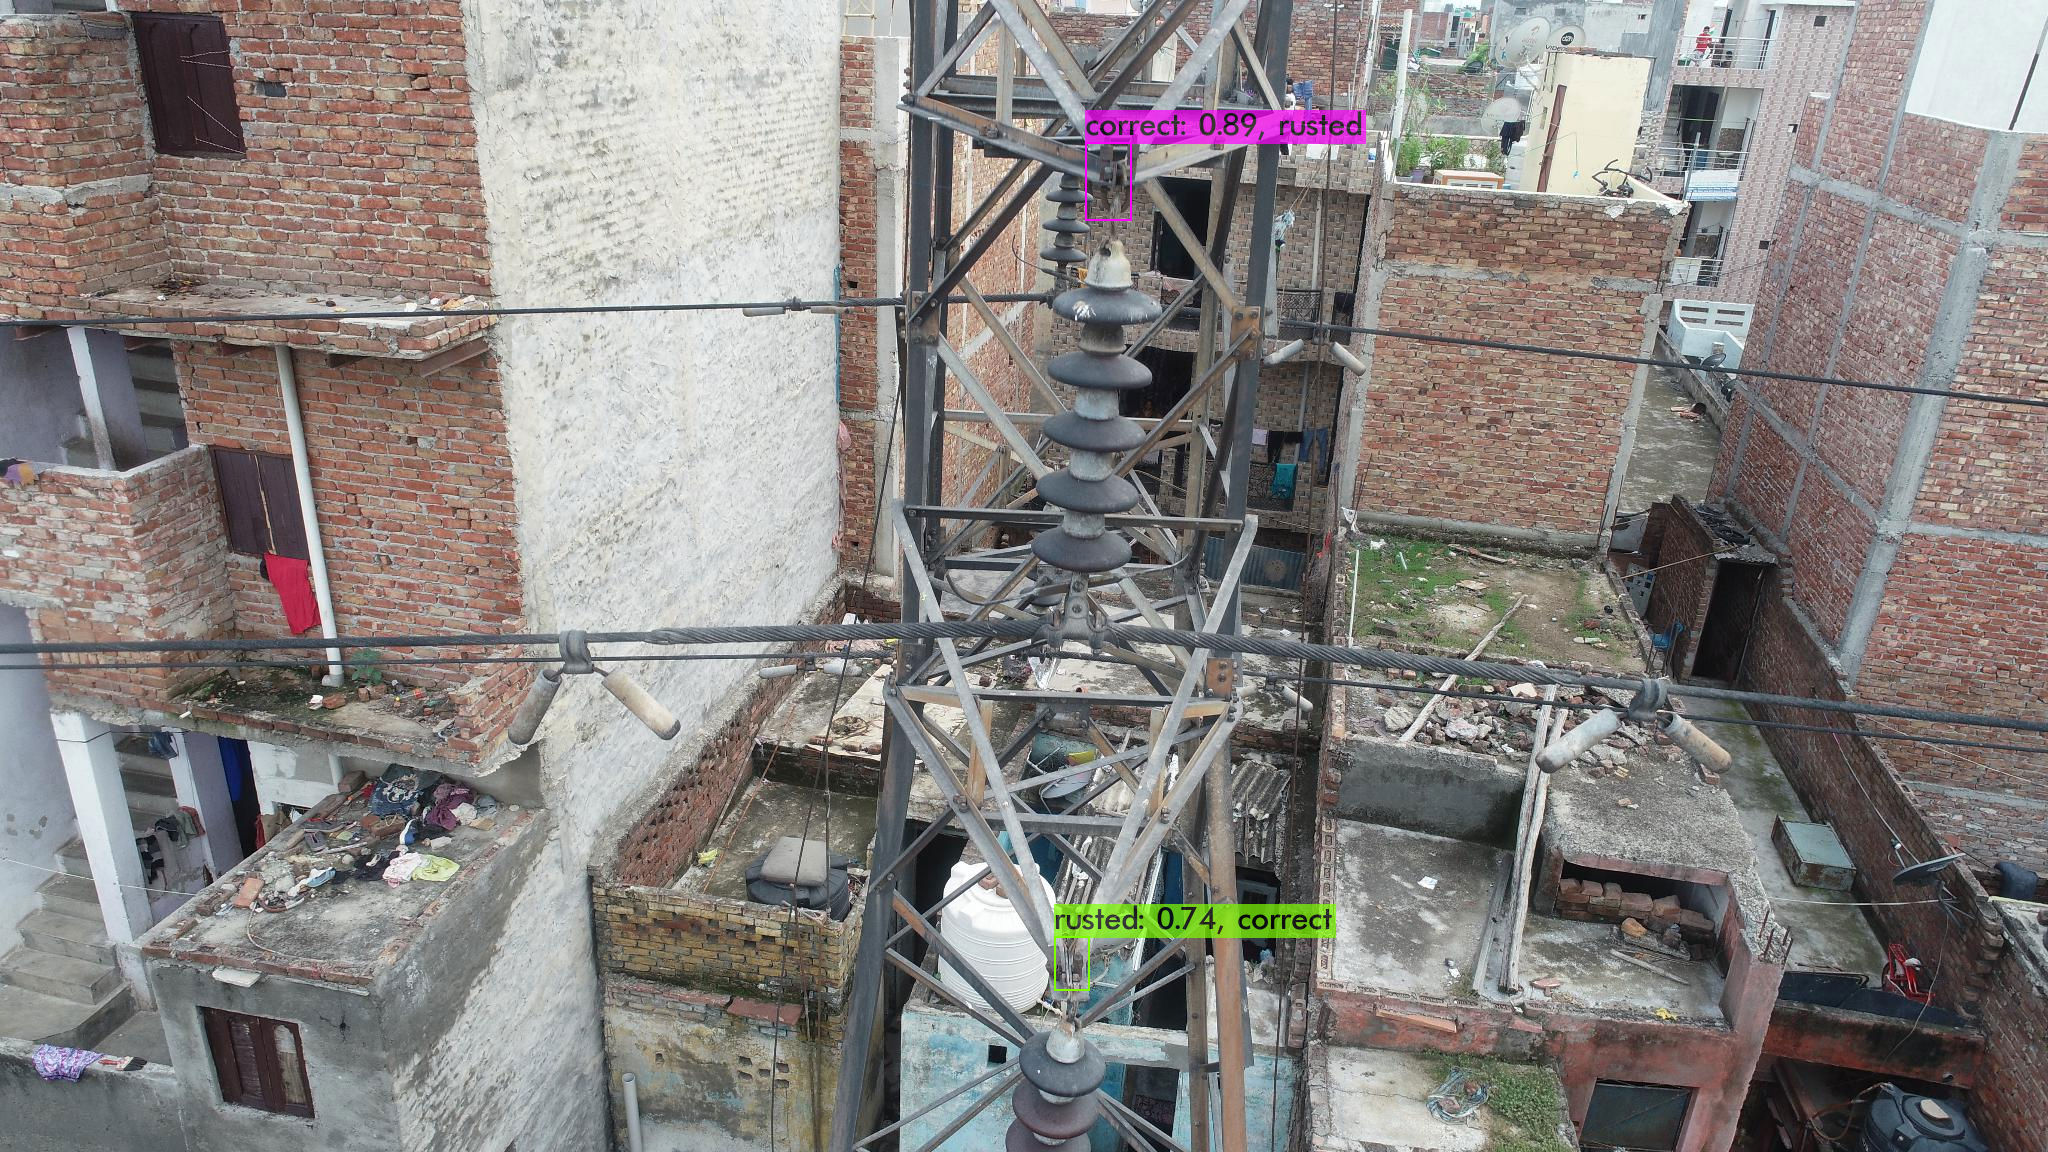

In [ ]:
!./darknet detector test custom_data/detector.data custom_data/cfg/yolov3-custom2.cfg backup/yolov3-custom2_2000.weights custom_data/test/test1/DJI_0528_JPG.rf.f271180da4406abec44e765177c81dc8.jpg -dont_show
from IPython.display import Image
from google.colab import files
files.download("predictions.jpg")
Image('predictions.jpg')

In [ ]:
# !wget https://pjreddie.com/media/files/yolov3.weights

In [ ]:
# !wget https://pjreddie.com/media/files/darknet53.conv.74

In [ ]:
import random
import os
import subprocess
import sys

def split_data_set(image_dir):

    f_val = open("custom_data/test.txt", 'w')
    f_train = open("custom_data/train.txt", 'w')
    
    path, dirs, files = next(os.walk(image_dir))
    data_size = len(files)

    ind = 0
    data_test_size = int(0.1 * data_size)
    test_array = random.sample(range(data_size), k=data_test_size)
    
    for f in os.listdir(image_dir):
        if(f.split(".")[3] == "jpg"):
            f_train.write("custom_data/images"+'/'+f+'\n')

In [ ]:
split_data_set("custom_data/upload")

In [ ]:
WINDOWS_LINE_ENDING = b'\r\n'
UNIX_LINE_ENDING = b'\n'

sou="custom_data/train.txt"
file_path = sou

with open(file_path, 'rb') as open_file:
    content = open_file.read()

content = content.replace(WINDOWS_LINE_ENDING, UNIX_LINE_ENDING)

with open(file_path, 'wb') as open_file:
    open_file.write(content)